# Préparation des données

## Import et data augmentations

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
!unzip /content/drive/MyDrive/bdappv/bdappv.zip > /dev/null

Mounted at /content/drive/


In [ ]:
!cp /content/drive/MyDrive/statapps-main/src/dataloader.py /content
!cp /content/drive/MyDrive/statapps-main/src/metrics.py /content
!cp /content/drive/MyDrive/statapps-main/src/resnet18.py /content

In [ ]:
from  dataloader import *
from metrics import *
from resnet18 import *
 
import pandas as pd
import numpy as np

from confusion_matrix import make_confusion_matrix
from sklearn.metrics import confusion_matrix

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn


import tensorflow as tf
import keras
import keras.layers as layers
from keras.losses import BinaryCrossentropy


ModuleNotFoundError: ignored

In [1]:
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [3]:
resnet = models.resnet18(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 213MB/s]


In [ ]:
# tf.random.set_seed(42)

# label_attribution = LabelAttribution(path_image_google='/content/bdappv/google/img', 
#                                    path_mask_google='/content/bdappv/google/mask',
#                                    path_metadata='/content/bdappv/metadata.csv',
#                                    colonne_identifiant='identifiant',
#                                    path_export_train_test='/content/drive/MyDrive',
#                                    path_image_ign='/content/bdappv/ign/img',
#                                    path_mask_ign='/content/bdappv/ign/mask',
#                                    use_img_google=True,
#                                    use_img_ign=False
#                                     )

In [ ]:
# label_attribution.run()

In [ ]:
# path_train="C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps/train_data.csv"
# path_test="C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps/test_data.csv"

# transformed_train_dataset  = CustomImageDataset(path_train,"C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/", transform=transforms.Compose([
#                                                transforms.Resize(224),
#                                                transforms.ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=(-0.5, 0.5)),
#                                                transforms.RandomCrop(160),
#                                                transforms.RandomHorizontalFlip(p=0.5),
#                                                transforms.RandomVerticalFlip(p=0.5),
#                                                transforms.RandomRotation(degrees = (0,180)),
#                                                transforms.Resize(224),
#                                                transforms.ToTensor(),
#                                                #transforms.Normalize(mean = [0.2969593107700348, 0.29610514640808105, 0.29613879323005676],
#                                                                     #std= [0.19015252590179443, 0.18941254913806915, 0.18982695043087006])

#                                            ]))

# #On resize et normalise uniquement sur le test
# transformed_test_dataset = CustomImageDataset(path_test,"C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/",
#                                             transform=transforms.Compose([
#                                                transforms.Resize(224),
#                                                transforms.ToTensor(),
#                                                #transforms.Normalize(mean = [0.3499923348426819, 0.3576664924621582, 0.3081061840057373],
#                                                                     #std= [0.16761955618858337, 0.14885342121124268, 0.1473139077425003])
#                                            ]))

In [ ]:
# print("Nombre d'images dans le train: {}".format(transformed_train_dataset.__len__()))
# print("Nombre d'images dans le test: {}".format(transformed_test_dataset.__len__()))

In [ ]:
# train_dataloader = DataLoader(transformed_train_dataset, batch_size=23045, shuffle=True)
# test_dataloader = DataLoader(transformed_test_dataset, batch_size=5762, shuffle=True)

In [ ]:
# mean_train, std_train = mean_std(train_dataloader)
# print("Moyenne par channel: {}".format(mean_train.tolist()))
# print("Ecart-type par channel: {}".format(std_train.tolist()))

In [ ]:
# mean_test, std_test = mean_std(test_dataloader)
# print("Moyenne par channel: {}".format(mean_test.tolist()))
# print("Ecart-type par channel: {}".format(std_test.tolist()))

In [ ]:
# path_train='/content/drive/MyDrive/train_data.csv'
# path_test='/content/drive/MyDrive/test_data.csv'


# normalized_train_dataset  = CustomImageDataset(path_train,'/content/bdappv/google/img', transform=transforms.Compose([
#                                                transforms.Resize(224),
#                                                transforms.ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=(-0.5, 0.5)),
#                                                transforms.RandomCrop(20),
#                                                transforms.RandomHorizontalFlip(p=0.5),
#                                                transforms.RandomVerticalFlip(p=0.5),
#                                                transforms.RandomRotation(degrees = (0,180)),
#                                                transforms.Resize(224),
#                                                transforms.ToTensor(),
#                                                transforms.Normalize(mean = [0.29619696736335754, 0.2954482138156891, 0.2950427234172821],
#                                                                     std= [0.21924977004528046, 0.21851609647274017, 0.2186581790447235]), 

#                                            ]))


# normalize_test_dataset = CustomImageDataset(path_test,'/content/bdappv/google/img',
#                                             transform=transforms.Compose([
#                                                transforms.Resize(224),
#                                                transforms.ToTensor(),
#                                                transforms.Normalize(mean = [0.34992772340774536, 0.35760578513145447, 0.3080298900604248],
#                                                                     std= [0.2013908326625824, 0.18425437808036804, 0.1794954240322113]), 
#                                            ]))
# train_dataloader_augmente = DataLoader(normalized_train_dataset, batch_size=23045, shuffle=True)
# test_dataloader_augmente = DataLoader(normalize_test_dataset, batch_size=5762, shuffle=True)

In [ ]:
# print("Nombre d'images dans le train: {}".format(normalized_train_dataset.__len__()))
# print("Nombre d'images dans le test: {}".format(normalize_test_dataset.__len__()))

Nombre d'images dans le train: 23045
Nombre d'images dans le test: 5762


In [ ]:
# X_train, Y_train=next(iter(train_dataloader_augmente))
# X_test, Y_test=next(iter(test_dataloader_augmente))

# X_train_permute=X_train.permute(0, 2, 3,1)
# X_test_permute=X_test.permute(0, 2, 3,1)

In [ ]:
X_train_permute=np.load('X_train_permute.npy', allow_pickle = True)
X_test_permute=np.load('X_test_permute.npy', allow_pickle = True)
Y_train=np.load("Y_train.npy", allow_pickle = True)
Y_test=np.load("Y_test.npy", allow_pickle = True)

# Lancement du modèle

Les cinq premières métriques représentent les performances de notre algorithme sur l'échantillon d'entrainement, les cinq dernières valeurs (celles précédées du préfixe val_) sont elles calculées sur l'échantillon de test. 

In [ ]:
model_init = buildModel()

In [ ]:
history=model_init.fit(x = X_train_permute.numpy(), y = Y_train.numpy(),
	validation_data=(X_test_permute.numpy(), Y_test.numpy()),
	batch_size=32,
	epochs=20)

Epoch 1/20
 16/721 [..............................] - ETA: 4:41:03 - loss: 1.6082 - Accuracy: 0.4844 - recall_m: 0.5057 - precision_m: 0.3524 - f1_m: 0.3839

KeyboardInterrupt: 

In [ ]:
recall = history.history['recall_m']
val_recall = history.history['val_recall_m']

accuracy = history.history['Accuracy']
val_accuracy = history.history['val_Accuracy']

precision = history.history['precision_m']
val_precision = history.history['val_precision_m']

f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(recall) + 1)

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].plot(epochs, loss, 'b', label="Loss sur l'échantillon d'apprentissage")
axs[0, 0].plot(epochs, val_loss, 'b', label="Loss sur l'échantillon test", color="red")
axs[0, 0].set_title("Loss sur l'échantillon d'apprentissage et l'échantillon test")
axs[0, 0].legend()

axs[0, 1].plot(epochs, accuracy, 'b', label="Accuracy sur l'échantillon d'apprentissage")
axs[0, 1].plot(epochs, val_accuracy, 'b', label="Accuracy sur l'échantillon test", color="red")
axs[0, 1].set_title("Accuracy sur l'échantillon d'apprentissage et l'échantillon test")
axs[0, 1].legend()

axs[1, 0].plot(epochs, precision, 'b', label="Precision sur l'échantillon d'apprentissage")
axs[1, 0].plot(epochs, val_precision, 'b', label="Precision sur l'échantillon test", color="red")
axs[1, 0].set_title("Precision sur l'échantillon d'apprentissage et l'échantillon test")
axs[1, 0].legend()

axs[1, 1].plot(epochs, recall, 'b', label="Recall sur l'échantillon d'apprentissage")
axs[1, 1].plot(epochs, val_recall, 'b', label="Recall sur l'échantillon test", color="red")
axs[1, 1].set_title("Recall sur l'échantillon d'apprentissage et l'échantillon test")
axs[1, 1].legend()

axs[2, 0].plot(epochs, f1, 'b', label="F1-score sur l'échantillon d'apprentissage")
axs[2, 0].plot(epochs, val_f1, 'b', label="F1-score sur l'échantillon test", color="red")
axs[2, 0].set_title("F1-score sur l'échantillon d'apprentissage et l'échantillon test")
axs[2, 0].legend()

fig.delaxes(axs[2,1]) # The indexing is zero-based here


In [ ]:
train_loss, train_accuracy, train_recall, train_precision, train_f1score = model_init.evaluate(
    X_train_permute.numpy(), Y_train.numpy(), verbose=0)
print("Loss sur l'échantillon train: {}".format(round(train_loss, 3)))
print("Accuracy sur l'échantillon train: {}".format(round(train_accuracy, 3)))
print("Recall sur l'échantillon train: {}".format(round(train_recall, 3)))
print("Precision sur l'échantillon train: {}".format(round(train_precision, 3)))
print("F1-score sur l'échantillon train: {}".format(round(train_f1score, 3)))


Loss sur l'échantillon test: 1.064
Accuracy sur l'échantillon test: 0.438
Recall sur l'échantillon test: 0.706
Precision sur l'échantillon test: 0.48
F1-score sur l'échantillon test: 0.571


In [ ]:
loss, accuracy, recall, precision, f1score = model_init.evaluate(
    X_test_permute.numpy(), Y_test.numpy(), verbose=0)
print("Loss sur l'échantillon test: {}".format(round(loss, 3)))
print("Accuracy sur l'échantillon test: {}".format(round(accuracy, 3)))
print("Recall sur l'échantillon test: {}".format(round(recall, 3)))
print("Precision sur l'échantillon test: {}".format(round(precision, 3)))
print("F1-score sur l'échantillon test: {}".format(round(f1score, 3)))


In [ ]:
prob_predict = model_init.predict(X_test_permute.numpy())
y_pred = (np.squeeze(prob_predict) > 0.5).astype("int32")

1/1 [==============================] - 38s 38s/step


In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)
res=dict(zip(unique, counts))
print("Nombre d'images prédites avec panneaux: {}".format(res[1]))
print("Nombre d'images prédites sans panneau: {}".format(res[0]))

Nombre d'images prédites avec panneaux: 25
Nombre d'images prédites sans panneau: 7


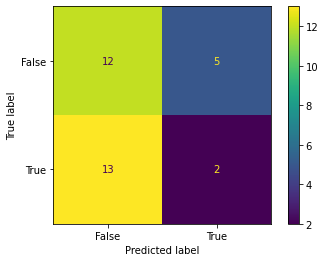

In [ ]:
r = confusion_matrix(Y_test, y_pred)

labels = ["Vrais négatifs", "Faux Positifs", "Faux négatifs", "Vrais positifs"]
categories = ["0", "1"]
make_confusion_matrix(r,
                      group_names=labels,
                      categories=categories,
                      )


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

FPR, TPR, thresholds_keras = roc_curve(Y_test.numpy(), prob_predict)
AUC = auc(FPR, TPR)
print("AUC: {}".format(round(AUC, 2)))


In [ ]:
# plot the roc curve for the model

plt.title('Courbe ROC:  ResNet-18')
plt.plot(FPR, TPR, label="AUC="+str(round(AUC, 2)))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.legend(loc=4)
plt.show()


# Hyperparamétrisation du ResNet-18

Sur le nombre d'itérations (n_iter): https://towardsdatascience.com/hyper-parameter-tuning-with-randomised-grid-search-54f865d27926
En pratique, n_iter=60.

In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import RandomizedSearchCV

# learnRate = [1e-2, 1e-3, 1e-4]
# momentum = [0.9, 0.99]
# dropout1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# dropout2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# dropout3 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# dropout4 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# dropout5 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# weight_decay=[1e-4, 1e-6]
# batchSize = [4, 8, 16, 32, 64, 128, 256]
# epochs = [10, 20, 30, 40, 50]

# grid = dict(
#     learnRate=learnRate,
#     momentum=momentum,
#     dropout1=dropout1,
#     dropout2=dropout2,
#     dropout3=dropout3,
#     dropout4=dropout4,
#     dropout5=dropout5,
#     weight_decay=weight_decay,
#     batch_size=batchSize,
#     epochs=epochs
# )

# model = KerasClassifier(build_fn=buildModel, verbose=1)
# #grid = GridSearchCV(estimator=model, param_grid=hyperMatrix)

# # n_iter: nombre de modèles entrainés
# searcher = RandomizedSearchCV(
#     estimator=model, cv=5, n_iter=10, param_distributions=grid, scoring='recall')
# searchResults = searcher.fit(
#     X_train_augmente_permute.numpy(), Y_train_augmente.numpy())
